In [47]:
# Import the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# Remove warnings

import warnings
warnings.filterwarnings("ignore")


In [49]:
# Read the data

df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [50]:
# Display first 5 rows

df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [51]:
# Display last 5 rows

df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [52]:
# Information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [53]:
# display the column names

df.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [54]:
df.value_counts()

Delivery Time  Sorting Time
8.00           2               1
17.90          10              1
24.00          9               1
21.50          5               1
21.00          10              1
19.83          8               1
19.75          6               1
19.00          7               1
18.75          9               1
18.11          7               1
17.83          7               1
9.50           3               1
16.68          7               1
15.35          6               1
14.88          4               1
13.75          6               1
13.50          4               1
12.03          3               1
11.50          3               1
10.75          4               1
29.00          10              1
dtype: int64

In [55]:
# To check missing values

df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [56]:
# to check duplicated values

df.duplicated().sum()

0

In [57]:
# Statistical information of the data

df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [58]:
# number of rows and columns

df.shape

(21, 2)

In [59]:
# Skewness

df.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

In [60]:
# Kurtosis

df.kurt()

Delivery Time    0.317960
Sorting Time    -1.148455
dtype: float64

In [61]:
# rename the column names for our convenience

df.rename(columns={"Delivery Time":"delivery_time","Sorting Time":"sorting_time"},inplace = True)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


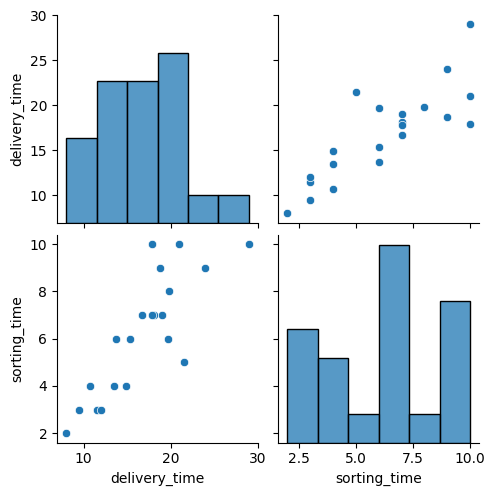

In [62]:
# Visualizations

# pairplot

sns.pairplot(df)

<Axes: xlabel='delivery_time', ylabel='Density'>

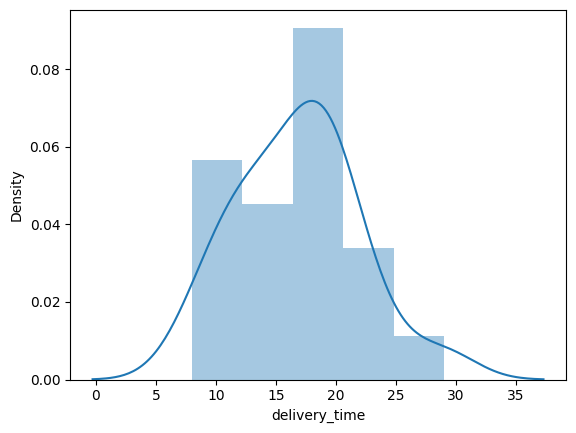

In [63]:
sns.distplot(df["delivery_time"])


<Axes: xlabel='sorting_time', ylabel='Density'>

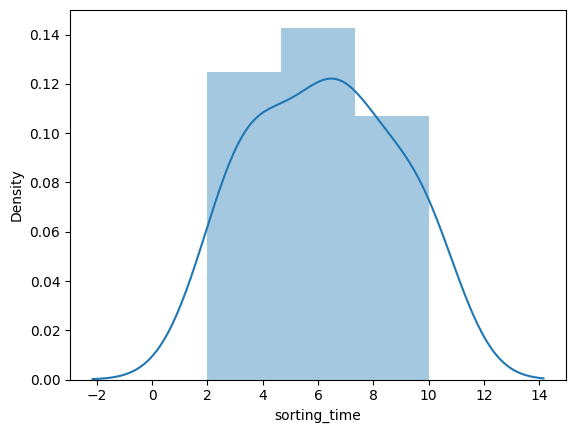

In [64]:
sns.distplot(df["sorting_time"])

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

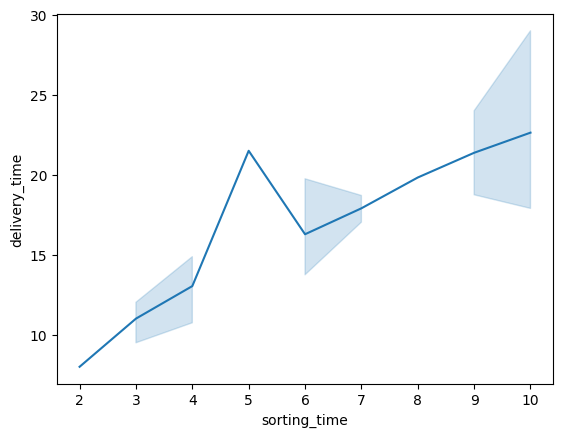

In [65]:
# Lineplot

sns.lineplot(x="sorting_time",y="delivery_time",data=df)

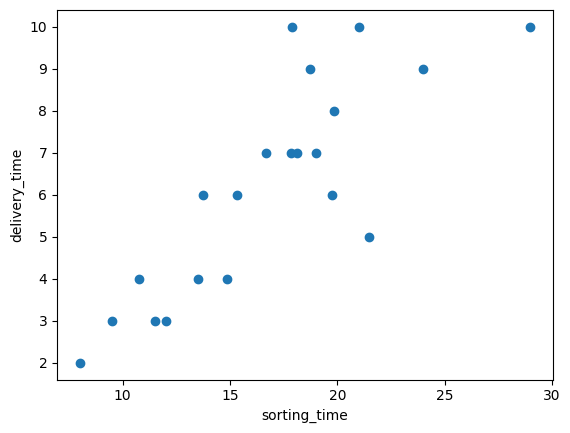

In [66]:
# Sactterplot

plt.scatter(df["delivery_time"],df["sorting_time"])
plt.xlabel("sorting_time")
plt.ylabel("delivery_time")
plt.show()


In [67]:
# correlation

df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: >

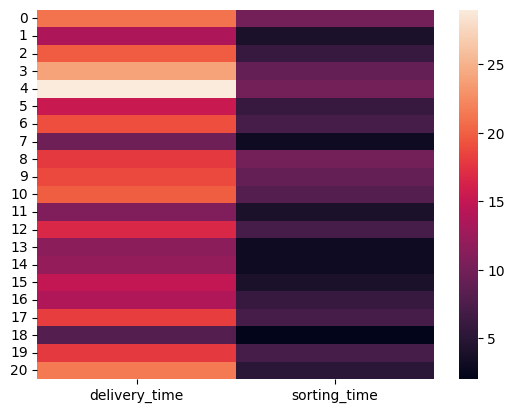

In [71]:
# Heatmap

sns.heatmap(df)

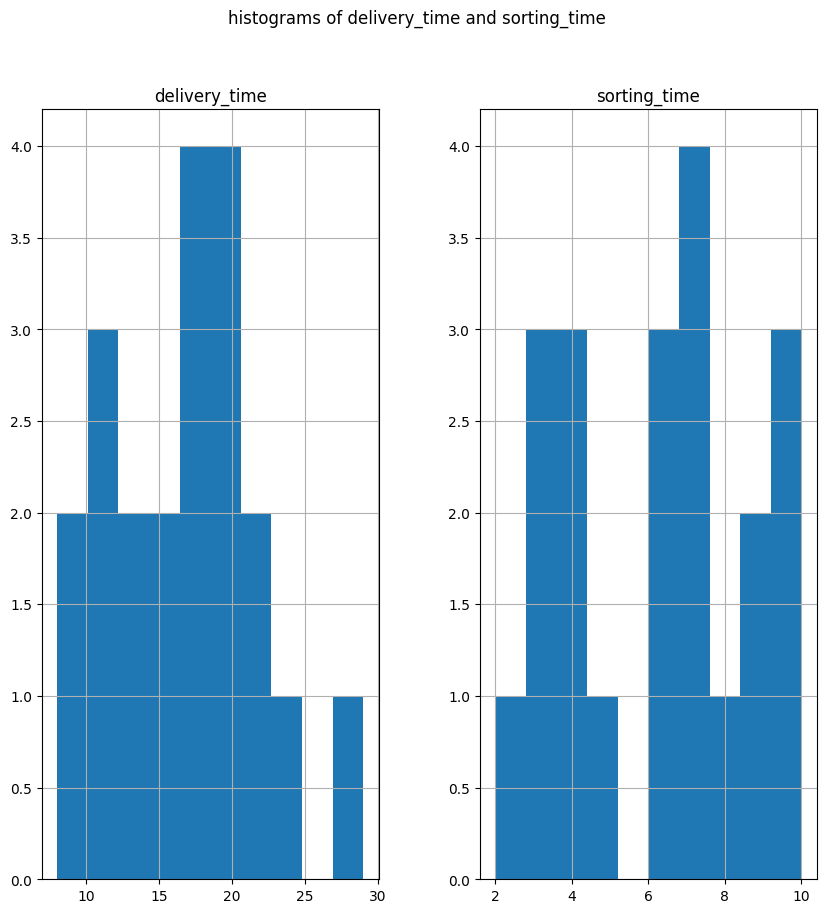

In [68]:
# Histogram

df.hist(figsize=(10,10))
plt.suptitle("histograms of delivery_time and sorting_time")
plt.show()


In [72]:
# maintain the copy of dataset

df1 = df.copy()
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [73]:
# Independent and Dependent Variables

x = df1[["sorting_time"]]
y = df1[["delivery_time"]]


In [103]:
# Training and Testing the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15)


# Feature Scaling

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(x_train)
xtest = scaler.transform(x_test)

# Using Stats model method

In [105]:
import statsmodels.api as sm
model = sm.OLS(y_train , xtrain).fit()


In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.072
Model:                            OLS   Adj. R-squared (uncentered):              0.010
Method:                 Least Squares   F-statistic:                              1.165
Date:                Thu, 01 Feb 2024   Prob (F-statistic):                       0.297
Time:                        17:29:33   Log-Likelihood:                         -67.634
No. Observations:                  16   AIC:                                      137.3
Df Residuals:                      15   BIC:                                      138.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.6206      4.281      1.079      0.297      -4.504      13.745
==============================================================================
Omnibus:                        2.539   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                0.925
Skew:                           0.536   Prob(JB):                        0.630
Kurtosis:                       3.489   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Using Scikit-Learn method

In [107]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
model1 = linear.fit(x,y)


In [109]:
model1

LinearRegression()

In [110]:
df1["ypred"] = model1.predict(x)
df1["ypred"]

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
Name: ypred, dtype: float64

In [111]:
# Coefficient of the model

model1.coef_


array([[1.6490199]])

In [112]:
# Intercept of the model

model1.intercept_


array([6.58273397])

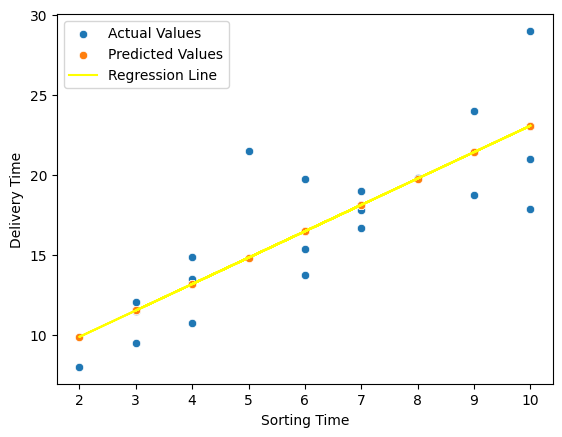

In [115]:
sns.scatterplot(x='sorting_time', y='delivery_time', data=df1, label="Actual Values")
sns.scatterplot(x='sorting_time', y='ypred', data=df1, label="Predicted Values")

# Plot the Regression line


plt.plot(df1['sorting_time'],df1["ypred"], color='yellow', label='Regression Line')

plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend()
plt.show()


In [116]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mse_ = mean_squared_error(df1['delivery_time'], df1['ypred'])
print("Mean Squared Error:", mse_)


Mean Squared Error: 7.793311548584063


In [117]:
# Root Mean Squared Error

rmse = np.sqrt(mean_squared_error(df1['delivery_time'], df1['ypred']))
print("Root Mean squared Error",rmse)

Root Mean squared Error 2.7916503270617654
